### Key Concepts of Gradient Boosting

1. **Ensemble Learning**:
   - Combines multiple models (weak learners) to produce a more accurate and robust model (strong learner).
   - Each weak learner is typically a decision tree with shallow depth, making it less prone to overfitting.

2. **Sequential Learning**:
   - Trees are added one at a time, and each new tree corrects the errors of the combined ensemble of all previous trees.
   - This sequential nature allows the model to adapt and improve iteratively.

3. **Gradient Descent**:
   - Gradient Boosting optimizes the loss function by gradient descent.
   - The algorithm identifies the direction and step size to reduce the prediction error.

### Steps in Gradient Boosting

1. **Initialize the Model**:
   - Start with an initial prediction, often the mean value of the target variable for regression or the log-odds for binary classification.
   
2. **Compute Residuals**:
   - Calculate the residuals (errors) between the actual target values and the predicted values from the current model.
   - For regression: Residual = Actual value - Predicted value.
   - For classification: Residual = Actual label - Predicted probability.

3. **Fit a Weak Learner**:
   - Fit a decision tree (regressor) to the residuals. This tree will learn how to correct the errors made by the current model.
   
4. **Update the Model**:
   - Update the current model by adding the newly fitted tree, scaled by a learning rate (shrinkage factor).
   - Learning rate (lr) is a hyperparameter that controls the contribution of each tree. A smaller learning rate means more trees are needed for accurate predictions but can lead to better generalization.

5. **Iterate**:
   - Repeat steps 2-4 for a specified number of iterations (trees) or until the residuals are minimized.

### Gradient Boosting for Regression

Here's a step-by-step example using pseudo-code:

```python
# Initialize model with the mean of the target variable
F0 = np.mean(y)

for m in range(M):
    # Compute residuals
    residuals = y - Fm
    
    # Fit a decision tree regressor to the residuals
    tree = DecisionTreeRegressor(max_depth=d)
    tree.fit(X, residuals)
    
    # Predict the residuals with the new tree
    predictions = tree.predict(X)
    
    # Update the model with the new tree
    Fm = Fm + lr * predictions
```

### Gradient Boosting for Classification

For binary classification, the process is similar but involves probabilities and log-odds. Here's how it works:

1. **Initialize** with log-odds:
   - log_odds = log(p / (1 - p))
   - Convert log-odds to initial probability using the sigmoid function:
   p = 1 / (1 + exp(-log_odds))

2. **Compute Pseudo-residuals**:
   - Residuals are computed as the difference between the actual labels and predicted probabilities.
   - residuals = y - p_hat

3. **Fit Weak Learner**:
   - Fit a decision tree regressor to the pseudo-residuals.

4. **Update Predictions**:
   - Update the log-odds: log_odds = lr * tree_predictions
   - Convert updated log-odds back to probabilities.

### Advantages of Gradient Boosting

- **High Accuracy**: Often yields highly accurate models.
- **Flexibility**: Can optimize any differentiable loss function.
- **Feature Importance**: Provides insights into the importance of features.

### Disadvantages of Gradient Boosting

- **Computationally Intensive**: Can be slow to train, especially with large datasets.
- **Overfitting**: Prone to overfitting if not properly regularized (e.g., with learning rate, tree depth).
- **Parameter Tuning**: Requires careful tuning of hyperparameters such as the number of trees, learning rate, and tree depth.

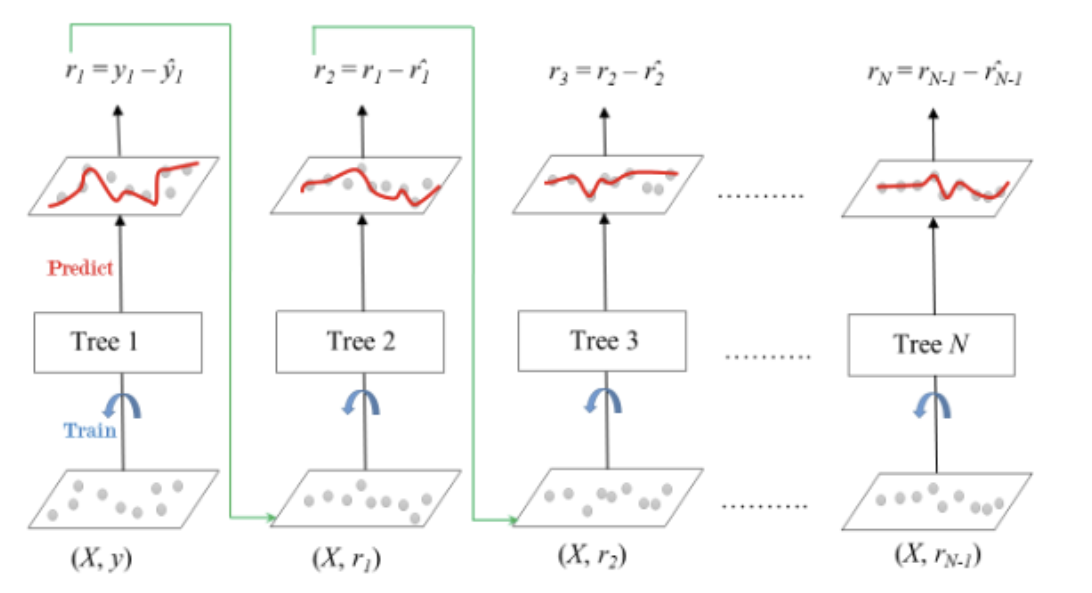

In [ ]:
import numpy as np
import math
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Load the breast cancer dataset
X, y = datasets.load_breast_cancer(as_frame=True, return_X_y=True)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gradient_boost_classification(X, y, M, lr):
    log_of_odds = np.log(y.value_counts()[1] / y.value_counts()[0])
    probability = np.exp(log_of_odds) / (1 + np.exp(log_of_odds))
    y_hat = np.full(y.shape, probability)

    for i in range(M):
        # calculate residuals
        residuals = y - y_hat
        # fit the tree for residuals
        regressor = DecisionTreeRegressor(max_depth=2)
        regressor.fit(X, residuals)
        # Predict residuals
        reg_pred = regressor.predict(X)
        # Update log-odds predictions
        log_of_odds_prediction = np.log(y_hat / (1 - y_hat)) + lr * reg_pred
        # Update predictions using sigmoid transformation
        y_hat = sigmoid(log_of_odds_prediction)

    return y_hat

y_hat = gradient_boost_classification(X, y, 100, 0.1)

accuracy = np.sum(np.abs(y_hat - y) < 0.3) / len(y)

print("Accuracy: ", accuracy)


Accuracy:  0.9420035149384886
